## **HSS 611: Week 13 - Network analysis with networkx**

### **2023-11-20**



---
### **What is a network, and what compromises a network?**

- A **network** is a set of entities (a.k.a. **nodes**), along with a set of coonections between pairs of nodes (a.k.a. **links** or **ties**)

- Links respresent the presence of a relationship among the entities represented by the nodes

- Alternatively, a network is as also called a **graph** in graph thoery (a field in mathematics)

- Here, a node is referred to as a **vertex** (**vertices** in plural), and a link as an **edge**

---
### **Networks are everywhere!**
- The natural and social systems consist of relationships between entities
- Biological networks govern the interactions between genes in our cells, shaping our development
- Neural networks undergird our cognition
- Political networks (e.g, between legislators, interest groups, etc.) shape policy
- Social networks (e.g., between users on online platforms) motivate protests
- Many many more ...

---
### **Benefits of network analysis**

- Networks provide a general theoretical framework allowing for a convenient conceptual representaiton of interrelations in a wide array of systems
- Part of "being general" implies that we strip out many details of a particular system and focus on entities and their relationships
- Quantitative/statistical analysis of networks enables us to understand many things, including (but not limited to)
  - Who are important entitiies?
  - What are the major clusters in a system?
  - Underwhat conditions do entitiy forms links?
  - And, in turn, how do links influence entities?
  - Let's spend a few minutes thinking about what those would be in the topic of your interest

---
### **A brief introduction to programming for descriptive network analysis**

- Representing network data
  - Nodes
  - Links: directed/undirected, weighted/unweighted
  - Node/link attributes
- Key concepts and descriptive statistics
  - Degree, density
  - Path, distance
  - Centralization, centrality
  - Assortativity
- Visualization in Python (throughout)


---
### **Network science is a huge field**
- Today we will be playing on the tip of the iceberg
- Also there is a wide variety of tools for network analyis
  - `networkx` (python)
  - `igraph` (python, R)
  - `sns` (R)
  - `Gephi`
  - Etc.

---
### **Creating and playing with a toy network with `networkx`**

#### Generating a `Graph` object

In [2]:
### import the networkx package as nx

import networkx as nx

In [3]:
### generate a graph object

g = nx.Graph() # the Graph function to generate an empty network
type(g) # we now have a Graph object

networkx.classes.graph.Graph

In [5]:
### create nodes and edges with add_node / add_edge methods

for i in 'ABCD': # add nodes
  g.add_node(i)
print(g)

g.add_edge('A', 'B') # add edges
g.add_edge('C', 'D')
g.add_edge('A', 'D')
g.add_edge('B', 'C')
g.add_edge('B', 'D')
print(g)

Graph with 4 nodes and 0 edges
Graph with 4 nodes and 5 edges


In [6]:
### alternatively we can use add_nodes_from / add_edges_from methods

g.add_nodes_from(['A', 'B', 'C', 'D']) # note that nodes are in the list
g.add_edges_from([('A', 'B'), ('C', 'D'), ('A', 'D'), ('B', 'C'), ('B', 'D')]) # 2-tuples contained in list
print(g)

Graph with 4 nodes and 5 edges


In [7]:
### examine the number of nodes and edges

print(g.number_of_nodes()) # number of nodes
print(g.number_of_edges()) # number of edge

4
5


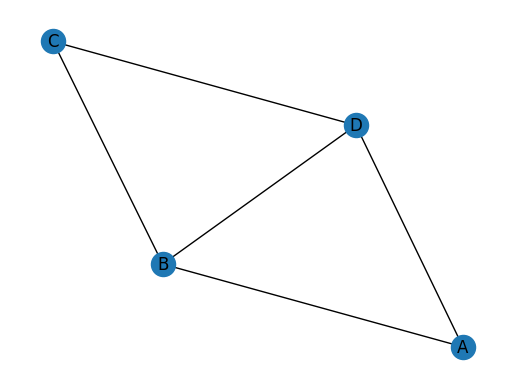

In [10]:
### let's try plotting it

import matplotlib.pyplot as plt # import matplotlib

plt.axis('off')  # turn off axis
nx.draw(g, with_labels = True) # use the draw function by passing the graph object
plt.show();

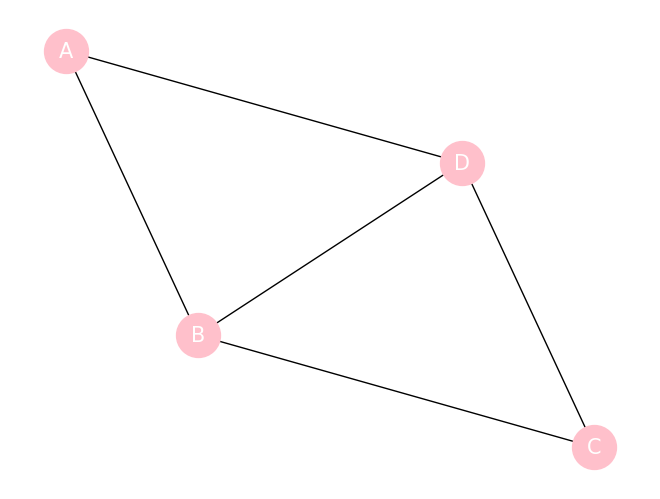

In [13]:
### many optional arguments to customize the appearance (see https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)

nx.draw(g,
        with_labels = True, # whether to include node labels
        node_color = 'pink',
        node_size = 1000,
        font_color = 'white',
        font_size = 15)

#### NodeView and EdgeView objects

In [14]:
### use nodes method to view the nodes

g.nodes # this is a NodeView object

g.nodes['A'] # note that networkx does not store a separate object for each node!

l_nodes = list(g.nodes) # this is how you can craete a list of nodes

print(l_nodes)
print(l_nodes[0])

['A', 'B', 'C', 'D']
A


In [ ]:
### a NodeView object is iterable

for n in g.nodes:
  print(n)

A
B
C
D


In [21]:
### the same applies to edges

g.edges

g.edges[('A', 'B')]

l_edges = list(g.edges)

print(l_edges)
print(l_edges[0])

for e in g.edges:
  print(e)

('A', 'B')


#### Check the presence of particular nodes and edges

In [27]:
### has_node and has_edge to see if a node/edge is in the network

print(g.has_node('Z')) # we can use has_node
print(g.has_edge('A', 'B')) # and has_edge

### alternatively just see 'in'

print('A' in g.nodes)
print(('A', 'B') in g.edges)

False
True
True
True


#### Get (the list of) neighbors

In [30]:
### getting the nodes linked to 'B'

g.neighbors('B')
type(g.neighbors('B')) # this is an iterator (for performance purposes, many networkx fucntions return iterators)

for nb in g.neighbors('B'): # so we can of course iterate
    print(nb)

l_B_nb = list(g.neighbors('B')) # or just tranform it into a list
print(l_B_nb)

A
C
D
['A', 'C', 'D']


#### Adding node attributes

In [32]:
### nodes have attributes (features or variables)

g.nodes['A']['field'] = 'pol' # e.g., we are adding a node attribute for a given student's field of research
g.nodes['B']['field'] = 'soc'
g.nodes['C']['field'] = 'psych'
g.nodes['D']['field'] = 'cs'

### note the difference when we access a node from the NodeView object

g.nodes['A'] # previously it yielded an empty dictionary

### use get_node_attributes function to view nodes along with their attributes

print(nx.get_node_attributes(g, 'field'))

{'A': 'pol', 'B': 'soc', 'C': 'psych', 'D': 'cs'}


In [33]:
### use for loop

node_attr_field = {'A': 'pol',
                   'B': 'soc',
                   'C': 'psych',
                   'D': 'cs'}

for node, field in node_attr_field.items():
    g.nodes[node]['field'] = field
print(nx.get_node_attributes(g, 'field'))

{'A': 'pol', 'B': 'soc', 'C': 'psych', 'D': 'cs'}


In [37]:
### use dictionary comprehension with set_node_attributes function

node_attr_field = {'A': 'pol',
                   'B': 'soc',
                   'C': 'psych',
                   'D': 'cs'}
attributes = {node: {'field': field} for node, field in node_attr_field.items()}
nx.set_node_attributes(g, attributes) # https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html
print(nx.get_node_attributes(g, 'field'))

{'A': 'pol', 'B': 'soc', 'C': 'psych', 'D': 'cs'}


In [313]:
### from a pandas DataFrame containg multiple node attributes

import pandas as pd

data = {'node_id': ['A', 'B', 'C', 'D'],
        'field': ['pol', 'soc', 'psych', 'cs'],
        'year': [1, 4, 3, 2]}
df = pd.DataFrame(data)

print(df)

### generate a network

g = nx.Graph() # create a Graph object
g.add_nodes_from(df['node_id']) # add nodes from the node_id Series
g.nodes # show the NodeView object

g.add_edge('A', 'B') # add edges
g.add_edge('C', 'D')
g.add_edge('A', 'D')
g.add_edge('B', 'C')
g.add_edge('B', 'D')

node_attrs = df.set_index('node_id').to_dict('index')
node_attrs

nx.set_node_attributes(g, node_attrs)

print(nx.get_node_attributes(g, 'field'))
print(nx.get_node_attributes(g, 'year'))

print(g.nodes(data = True))  # this is a NodeDataView object

,node_id,field,year
0,A,pol,1
1,B,soc,4
2,C,psych,3
3,D,cs,2


#### Adding edge attributes

In [50]:
### edges can have attributes as well, including weight (again, we can think of this as adding a key-value pair to an empty dictionary)

print(g['A']['B'])
print(g.edges['A', 'B'])

g['A']['B']['weight'] = 2
g['C']['D']['weight'] = 1
g['A']['D']['weight'] = 3
g['B']['C']['weight'] = 4
g['B']['D']['weight'] = 2

### this is an alternative approach

g.edges['A', 'B']['weight'] = 2
g.edges['C', 'D']['weight'] = 1
g.edges['A', 'D']['weight'] = 3
g.edges['B', 'C']['weight'] = 4
g.edges['B', 'D']['weight'] = 2

{}
{}


In [56]:
### let's view the results

print(g['A']['B'])

print(g.edges['A', 'B'])

print(nx.get_edge_attributes(g, 'weight'))

print(g.edges(data = True))

[('A', 'B', {'weight': 2}), ('A', 'D', {'weight': 3}), ('B', 'C', {'weight': 4}), ('B', 'D', {'weight': 2}), ('C', 'D', {'weight': 1})]


In [67]:
### we can do this for multiple attributes using a pandas DataFrame

data = {'source': ['A', 'C', 'A', 'B', 'B'], # this is typically called an "edge list"
        'target': ['B', 'D', 'D', 'C', 'D'],
        'weight': [2, 1, 3, 4, 2]}

df = pd.DataFrame(data)

g = nx.Graph() # generate a Graph object

for _, row in df.iterrows():
    source = row['source']
    target = row['target']
    attributes = row.drop(['source', 'target']).to_dict() # extract edge attributes from the row, excluding 'source' and 'target'
    g.add_edge(source, target, **attributes)

print(g)
print(g.nodes(data = True))

Graph with 4 nodes and 5 edges
[('A', {}), ('B', {}), ('C', {}), ('D', {})]


#### Generating a Graph object from a node list and an edge list

In [66]:
data_e = {'source': ['A', 'C', 'A', 'B', 'B'], # **maybe skip this as well**
        'target': ['B', 'D', 'D', 'C', 'D'],
        'weight': [2, 1, 3, 4, 2]}
df_e = pd.DataFrame(data_e)

data_n = {'node_id': ['A', 'B', 'C', 'D'],
        'field': ['pol', 'soc', 'psych', 'cs'],
        'year': [1, 4, 3, 2]}
df_n = pd.DataFrame(data_n)

g = nx.Graph()

for _, row in df_e.iterrows():
    source = row['source']
    target = row['target']
    attributes = row.drop(['source', 'target']).to_dict() # extract edge attributes from the row, excluding 'source' and 'target'
    g.add_edge(source, target, **attributes)

node_attrs = df_n.set_index('node_id').to_dict('index')
node_attrs
nx.set_node_attributes(g, node_attrs)

print(g)
print(g.nodes(data = True))
print(g.edges(data = True))

Graph with 4 nodes and 5 edges
[('A', {'field': 'pol', 'year': 1}), ('B', {'field': 'soc', 'year': 4}), ('C', {'field': 'psych', 'year': 3}), ('D', {'field': 'cs', 'year': 2})]
[('A', 'B', {'weight': 2}), ('A', 'D', {'weight': 3}), ('B', 'C', {'weight': 4}), ('B', 'D', {'weight': 2}), ('C', 'D', {'weight': 1})]


---
### **Types of networks**

- Undirected and directed networks
  - Undirected networks when the links do not have a direction
  - Networks with directed links are directed networks

- Unweighted and Weighted networks
  - Weight is a sort of an edge attribute indicating the strength/significance of the relationship
  
- The two dimensions yield four types of networks
  - Undirected/unweighted
  - Undirected/weighted
  - Directed/unweighted
  - Directed/weighted

- Bipartite network
  - Two groups of nodes such taht links only connect nodes from one group to the other group (not within in the same group)
  - Can be "projected"
  - E.g. co-citation network

### **Directed and weighted networks**

#### Directed network

DiGraph with 5 nodes and 6 edges


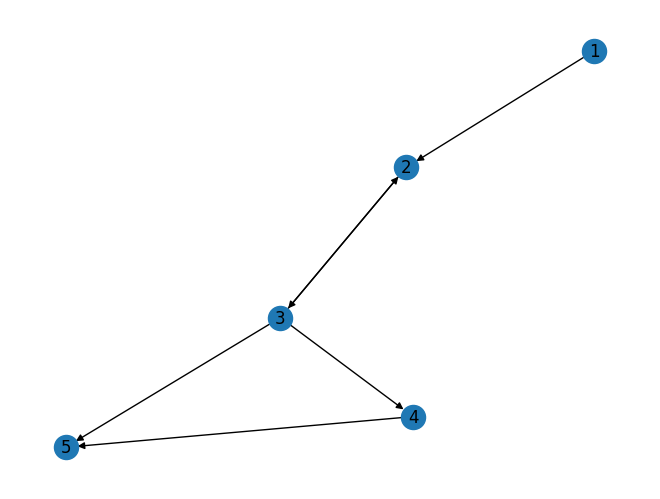

In [68]:
dg = nx.DiGraph() # DiGraph function to generate a "Di"rected network

dg.add_edges_from([(1, 2), (2, 3), (3, 2), (3, 4), (3, 5), (4, 5)]) # (source, target)

print(dg)

nx.draw(dg, with_labels = True)

In [69]:
print(dg.has_edge(1, 2))
print(dg.has_edge(2, 1))

True
False


#### Weighted network

In [74]:
wg = nx.Graph() # generate a Graph object (just regular Graph object)

edges = [(1, 2, 1), (1, 6, 2), (2, 3, 4), # (source, code, weight)
 (2, 4, 0.5), (2, 6, 3), (3, 4, 2)]

wg.add_weighted_edges_from(edges) # use add_weighted_edges_from function

wg.edges(data = True) # view edges and all attributes

for u, v, d in wg.edges(data = True):
    print(f"Edge between {u} and {v} has weight {d['weight']}")

wg.edges(data = 'weight') # view edges and weight

for u, v, w in wg.edges(data = 'weight'):
    print(f"Edge between {u} and {v} has weight {w}")

EdgeDataView([(1, 2, {'weight': 1}), (1, 6, {'weight': 2}), (2, 3, {'weight': 4}), (2, 4, {'weight': 0.5}), (2, 6, {'weight': 3}), (3, 4, {'weight': 2})])

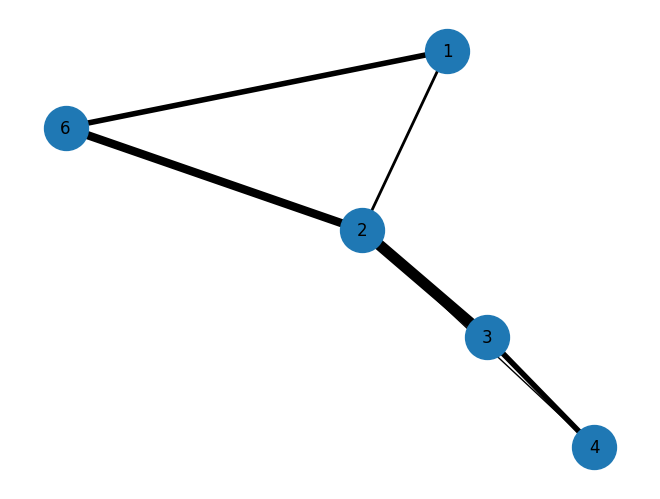

In [81]:
nx.draw(wg,
        width = [d['weight'] for u, v, d in wg.edges(data = True)],
        with_labels = True,
        node_size = 1000)

#### Directed weighted network

In [104]:
url = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_13/df_imports.csv'
df_imports = pd.read_csv(url)
del df_imports['Unnamed: 0']

df_imports.head()

,exporter,importer,import_volume
0,A,B,71
1,A,D,25
2,A,E,51
3,A,H,63
4,A,I,70


In [112]:
### from_pandas_edgelist function is useful

dwg = nx.from_pandas_edgelist(df_imports, # pandas DataFrame
                              'exporter', 'importer', # source and target
                              edge_attr = ['import_volume'], # weight
                              create_using = nx.DiGraph())

print(dwg)
print(type(dwg))

print(dwg.number_of_nodes())
print(dwg.number_of_edges())

print(dwg.edges(data = True))

DiGraph with 9 nodes and 39 edges
<class 'networkx.classes.digraph.DiGraph'>
9
39
[('A', 'B', {'import_volume': 71}), ('A', 'D', {'import_volume': 25}), ('A', 'E', {'import_volume': 51}), ('A', 'H', {'import_volume': 63}), ('A', 'I', {'import_volume': 70}), ('B', 'E', {'import_volume': 79}), ('B', 'G', {'import_volume': 2}), ('B', 'H', {'import_volume': 82}), ('B', 'I', {'import_volume': 73}), ('D', 'B', {'import_volume': 61}), ('D', 'C', {'import_volume': 77}), ('D', 'E', {'import_volume': 85}), ('D', 'H', {'import_volume': 97}), ('E', 'B', {'import_volume': 70}), ('E', 'C', {'import_volume': 73}), ('E', 'F', {'import_volume': 6}), ('E', 'H', {'import_volume': 80}), ('E', 'I', {'import_volume': 100}), ('H', 'B', {'import_volume': 90}), ('H', 'C', {'import_volume': 74}), ('H', 'I', {'import_volume': 52}), ('I', 'B', {'import_volume': 64}), ('I', 'C', {'import_volume': 53}), ('I', 'E', {'import_volume': 95}), ('I', 'H', {'import_volume': 66}), ('G', 'B', {'import_volume': 70}), ('G', 'D

<class 'networkx.classes.reportviews.InDegreeView'>
[('A', 0), ('B', 8), ('D', 3), ('E', 7), ('H', 7), ('I', 7), ('G', 1), ('C', 5), ('F', 1)]


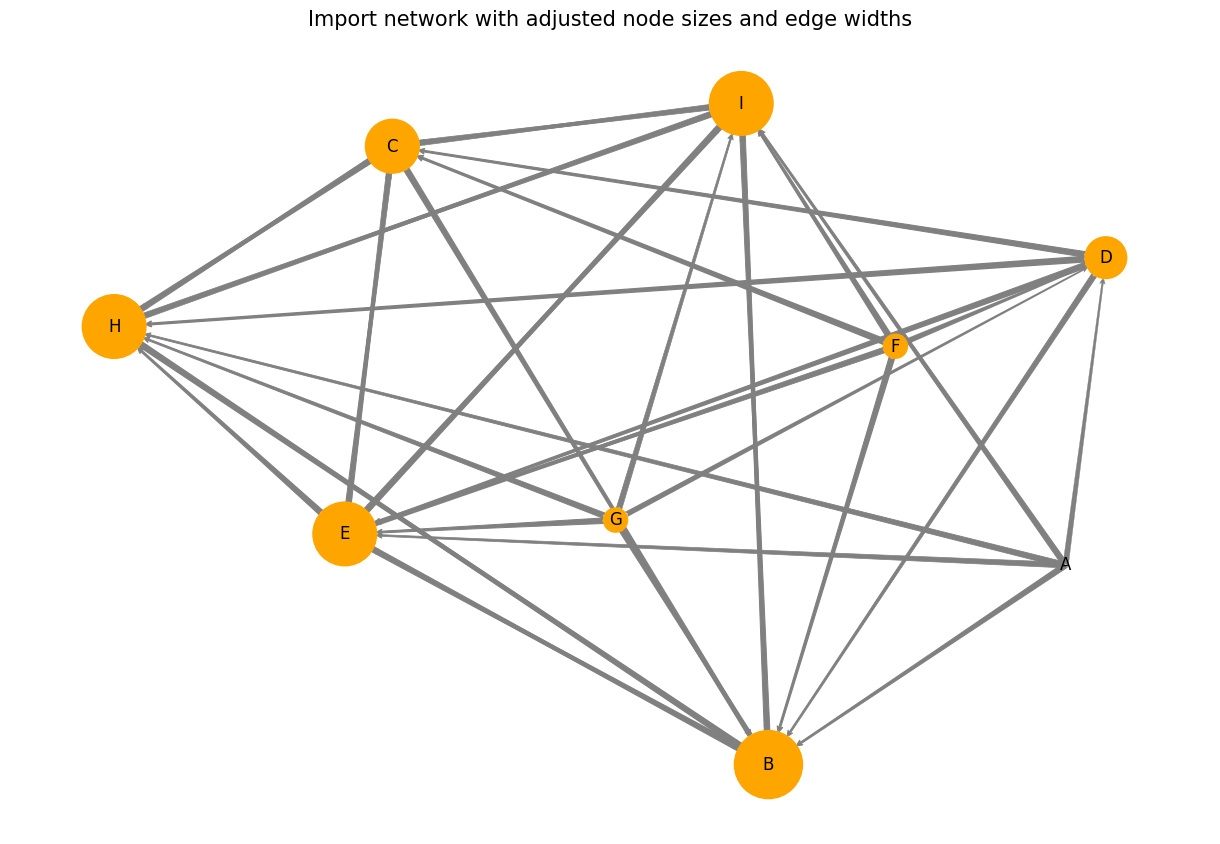

In [161]:
### we want node size proportionate to the number of edges being received

in_degrees_imports = dwg.in_degree() # calculate in-degree using the in_degree method
print(type(in_degrees_imports)) # this is a InDegreeView object
print(in_degrees_imports)

### the scale would look too small so let's try multiplying it by 300

node_sizes_imports = [in_degrees_imports[node] * 300 for node in dwg.nodes()] # note that InDegreeView works like dictionary

### set figure size

plt.figure(figsize=(12, 8))

### also set the layout

pos_imports = nx.spring_layout(dwg, seed = 7) # seed for replicability

### draw the network

nx.draw(dwg, pos_imports,
        node_size = node_sizes_imports,
        width = import_volumes / 100,
        node_color = 'orange',
        edge_color = 'gray',
        with_labels = True,
        arrows = True,
        arrowstyle = 'fancy',
        arrowsize = 10)

### show the plot

plt.title('Import network with adjusted node sizes and edge widths', fontsize = 15)
plt.axis('off')
plt.show()

#### Bipartite network and projection
-
-
-

---
### **Density and sparsity**

The extent to which nodes are connected, measured by the ratio between the observed connections in the network relative to the maximum number of possible connections.

- Undirected: $L_{max}$: n(n-1)/2
- Directed: $L_{max}$: n(n-1)
- $D$ (density) =  $L$ / $L_{max}$
- A complete network, a network with the maximum number of links, $D$ = 1

---
### **The Erdős-Rényi model (G(n, p) Model)**

A graph is generated by starting with $n$ isolated nodes, and then each of the possible $\binom{n}{2}$ edges (should be divided by 2 for undirected graphs) is added to the graph with probability $p$, independently of all other edges
- The parameter $p$ (ranging from 0 to 1) is the probability of any given edge being included in the graph
- The number of edges in the resulting graph follows a [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)


In [145]:
### use erdos_renyi_graph to generate an ER graph

erg = nx.erdos_renyi_graph(1000, 0.1)
print(nx.density(erg))

0.09962762762762763


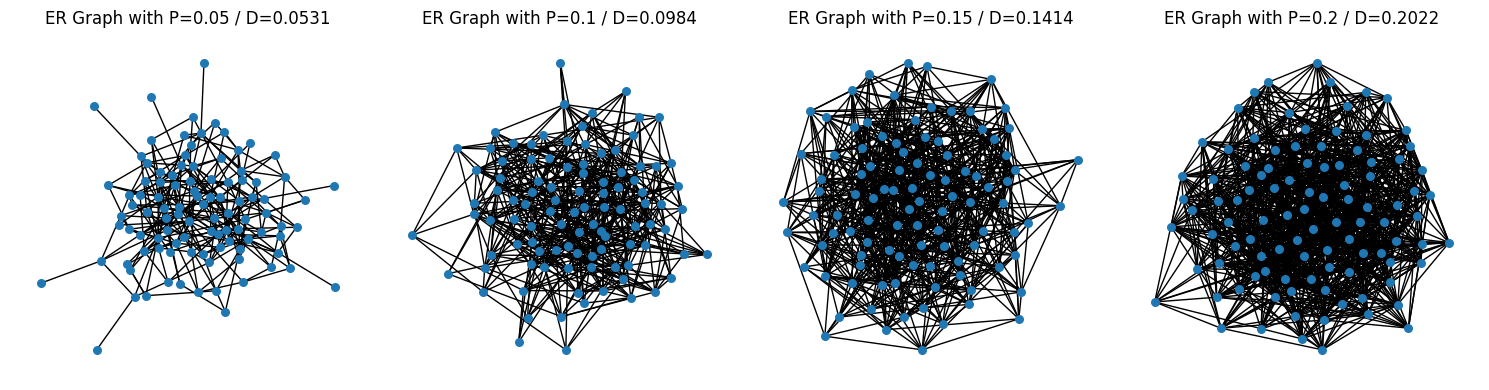

In [146]:
### let's generate several ER graphs, check their density, and plot them

probs = [0.05, 0.1, 0.15, 0.2]
fig, axs = plt.subplots(1, 4, figsize = (15, 4))

for ax, p in zip(axs, probs):

    n = 100
    erg = nx.erdos_renyi_graph(n, p) # directed = False (by default)
    d = nx.density(erg)

    nx.draw(erg,
            ax = ax,
            node_size = 30,
            with_labels = False)
    ax.set_title(f"ER Graph with P={p} / D={round(d, 4)}")

plt.tight_layout()
plt.show()

---

### **Degree**

- $K$ (degree): the number of links for a given node
- Indgree/outdegree for directed networks
- Weighted degree


['B', 'D']
2
[2, 3, 2, 3]


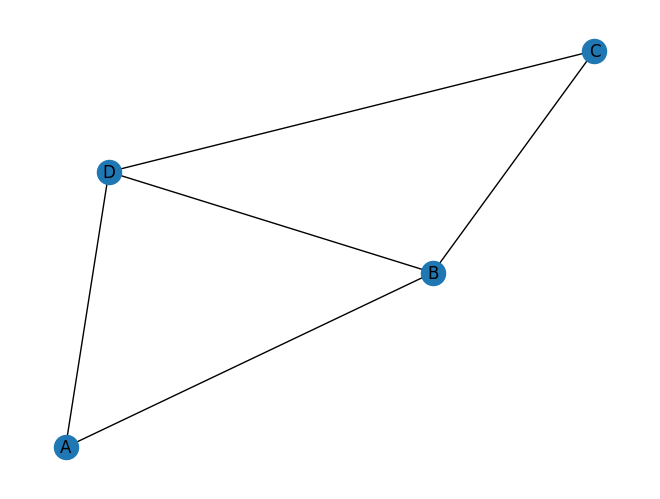

In [162]:
### undirected network

nx.draw(g, with_labels = True)

nb_A = list(g.neighbors('A')) # neighbors of A
print(nb_A)

k_A = g.degree('A') # the degree for A
print(k_A)

ks = [g.degree(n) for n in g.nodes()]
print(ks)

[2, 4, 5]
4
[1, 3, 4, 2, 2]


3

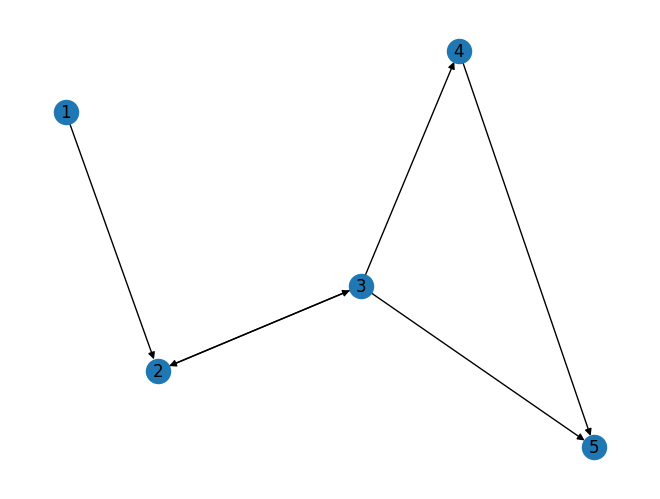

In [173]:
### directed network

nx.draw(dg, with_labels = True)

nb_3 = list(dg.neighbors(3)) # neighbors of 3 (regardless of direction)
print(nb_3) # 3

k_3 = dg.degree(3) # the degree for the node 3
print(k_3) # 4

ks = [dg.degree(n) for n in dg.nodes()]
print(ks)

list(dg.successors(3)) # out-neighbors
list(dg.predecessors(3)) # in-neighbors

dg.in_degree(3)
dg.out_degree(3)

---
### **Distance and path**
- If it is possible to move from a note to another (not necessarily through an edge between the two), there is a "path" between the pair of nodes
- There can be multiple paths for a a pair of nodes
- "Distance" is the minimum number of edges that must be traversed in a path connecting two nodes
    - Such path is the "shortest path"
    - Its lengh if "shortest path legnth"

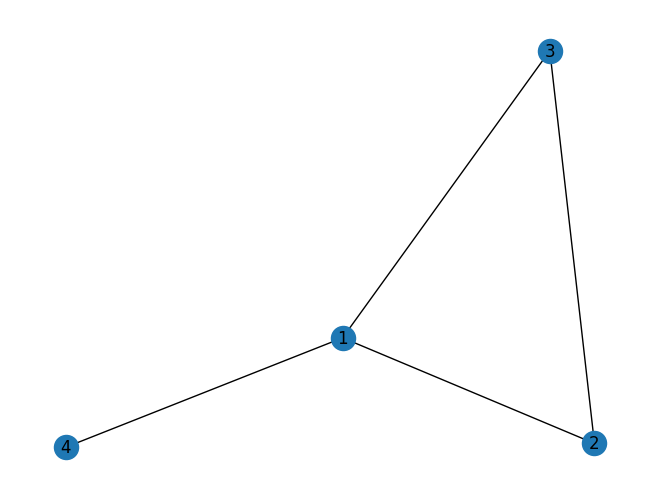

In [184]:
### undirected network

g = nx.Graph()

g.add_nodes_from([1,2,3,4])

g.add_edges_from([(1,2),(2,3),(1,3),(1,4)])

nx.draw(g, with_labels=True)

In [186]:
list(nx.all_simple_paths(g, 3, 4))

[[3, 2, 1, 4], [3, 1, 4]]

In [187]:
nx.shortest_path(g, 3, 4)
nx.shortest_path_length(g, 3, 4)

2

DiGraph with 6 nodes and 9 edges


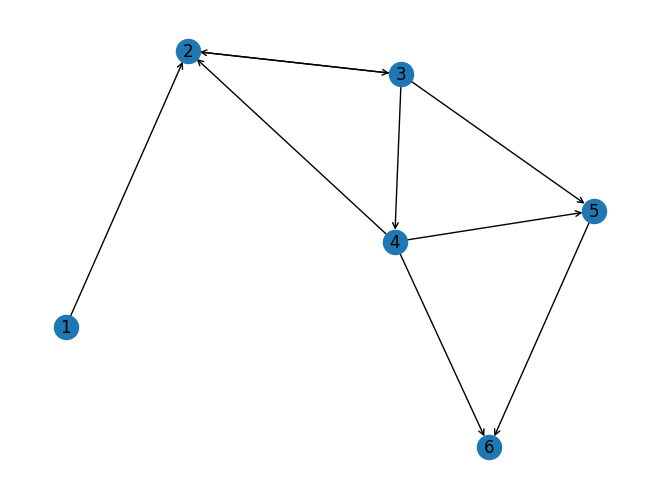

In [203]:
### directed network

dg = nx.DiGraph()
dg.add_edges_from([(1,2), (2,3), (3,2),
 (3,4), (3,5), (4,2),
  (4,5), (4,6), (5,6)])

nx.draw(dg,
        with_labels = True,
        arrowstyle = '->')
print(dg)

In [206]:
print(nx.has_path(dg, 3, 6))
print(nx.has_path(dg, 6, 3))

True
False


---
### **Centrality**

- Heterogeneous networks present a wide variability in the properties and roles of their nodes and edges
- Degree is an important source of network heterogeneity
- The importance of a node or a link is estiamted by computing its centrality
- There are several ways to conceptualize and measure centrality
  - Degree centrality
  - Closeness centrality
  - Betweenness centrality
  - More (e.g., eigenvector centrality)


#### Degree centrality

- High-degree nodes are nodes with many edges
- High-degree nodes are called "hubs"
- In a directed network
  - In-degree centrality (popular)
  - out-degree centrality (sociable)

#### Closeness centrality
- Closeness centrality measure how close a node is to the other nodes
- We sum the distances from a given node to all other nodes
- Smaller sum corresponds to higher centrality
- $G_i$ = $\frac{1}{\sum_{j \neq i}^{} l_{ij} / (N-1)}$ where $l_{ij}$ is the distance from the node $i$ to $j$ and the sum runs over all nodes in the network

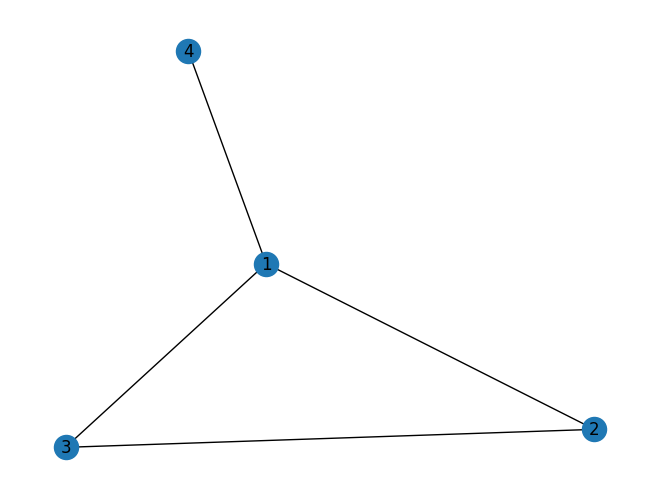

In [216]:
nx.draw(g, with_labels = True)

In [215]:
cent_c = [nx.closeness_centrality(g, n) for n in g.nodes]
cent_c

[1.0, 0.75, 0.75, 0.6]

#### Betweenness centrality
- A node with high betweenness centrality occupies a position in the network, such that it is an important station for the connection patterns running through the network
- E.g., in information diffusion, nodes with high betweenness centrality are likely to be invovled in the diffusion process
- The node $i$'s betweenness centrality is defined as $B_{i}$ = $\sum_{h \neq j, j \neq i}$ $\frac{\sigma_{hj}(i)}{\sigma_{hj}}$ where
  - $\sigma_{hj}$: the total number of shortest paths from $h$ to $j$
  - $\sigma_{hj}($i$)$: the number of these shortest paths that pass through node $i$



- Bridging positions (structural holes) grant control (e.g., over wehether to share information or not)
  - Those who span structural holes (a.k.a. "brokers") can leverage their unique positions to facilitate information flow, innovate, and arbitrate among otherwise disconnected groups
  - We need to consider not just the number of connections one has, but in the strategic position within the network, particularly in areas where these structural holes exist
  - See [Burt (2009)](https://www.journals.uchicago.edu/doi/abs/10.1086/421787?casa_token=RHjHG-Hg7sUAAAAA:h9dob-ZRgyg7VECq0ticU0H-RWrniWJYPaoKIRLaqsbEc48meFhBvvuBwnpWm56FQCHXljYC_hLsHSmp) for related discussions

  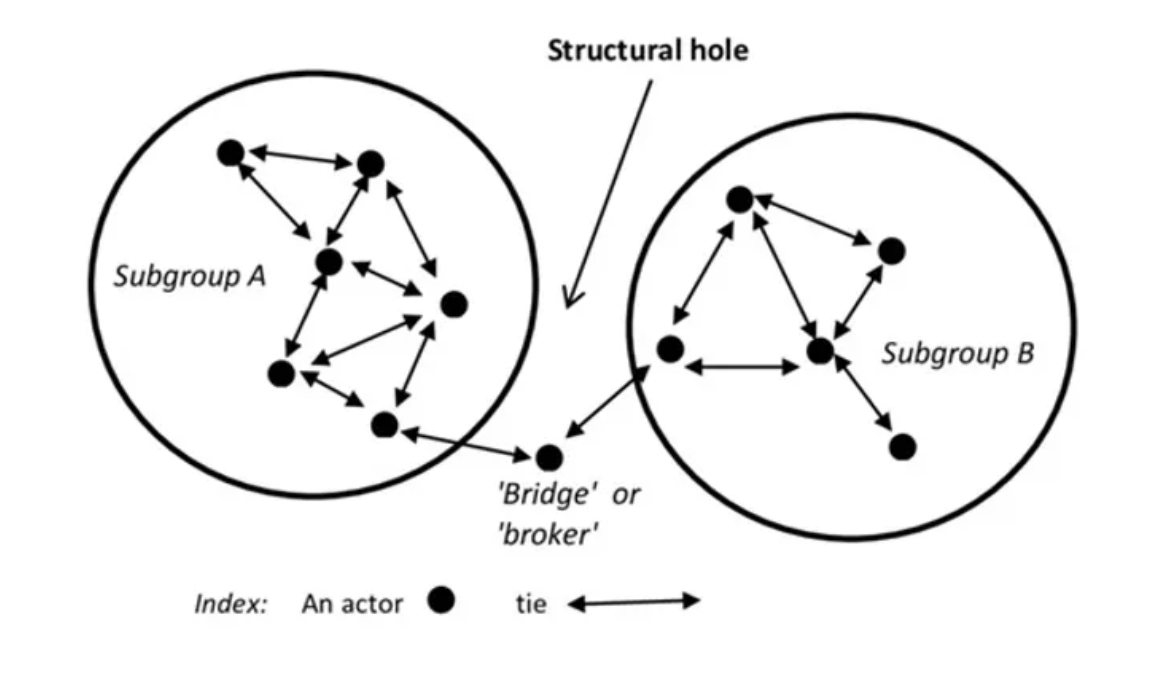
[image source](https://www.samuelcohn.net/how-to-get-rich-with-structural-hol)

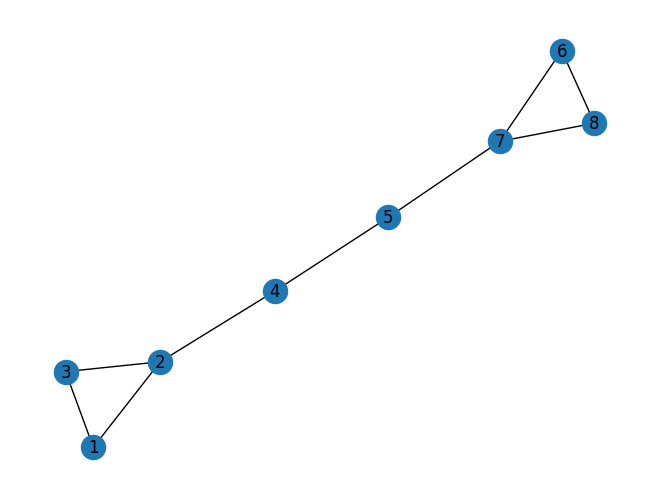

In [221]:
g = nx.Graph()

g.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

g.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4),
                  (4, 5), (5, 7),
                  (7, 8), (6, 7), (6, 8)
                  ])

nx.draw(g, with_labels=True)

In [231]:
nx.betweenness_centrality(g)

{1: 0.32626040687340707,
 2: 0.4250440456239761,
 3: 0.32626040687340707,
 4: 0.32626040687340707,
 5: 0.32626040687340707,
 6: 0.32626040687340707,
 7: 0.4250440456239761,
 8: 0.32626040687340707}

#### Eigenvector centrality
- With eigenvector centrality, connections to high-scoring nodes contribute more to the score of the node than equal connections to low-scoring nodes
- Nodes are considered influential if they are connected to other influential nodes (recursive definition)
- A high eigenvector score means a node is connected to many nodes who themselves have high scores



### **Assortativity**

- Assortativity is a tendency for nodes to connect with others that are similar in some way
- Assortativity is highly prevalent in social worlds
- Multiple factors can be responsible for assortativity
  - Homophily: birds of a feather flock together,
  - Social infleunce (or contagion): when people who are friedns become more simliar to each other over time
- See [Shalizi et al. (2011)](https://journals.sagepub.com/doi/abs/10.1177/0049124111404820?casa_token=fU3wY21CfGcAAAAA:l1XCoih1jEnhJ9TXxGrM3EkOOJFgoHyURv8MUN8xYNbIC5H_hmToygSdA92mvPe20nC73PKhajeE5HI) for a discussion of the dfficulty distinguishing homophily and social influence with observational data


In [399]:
### read data

url_node = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_13/nodes.csv'
node_list = pd.read_csv(url_node)

url_political = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_13/political_edges.csv'
political_edges = pd.read_csv(url_political)

url_non_political = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_13/non_political_edges.csv'
non_political_edges = pd.read_csv(url_non_political)

### create the two graphs

g_pol = nx.from_pandas_edgelist(political_edges, # pandas DataFrame
                              'source', 'target', # source and target
                              create_using = nx.Graph())
print(g_pol)

g_non_pol = nx.from_pandas_edgelist(non_political_edges, # pandas DataFrame
                              'source', 'target', # source and target
                              create_using = nx.Graph())
print(g_non_pol)

### add node attributes

node_list['ideology'] = [str(i[-2]) for i in node_list['attributes']]
del node_list['attributes']
node_list.set_index('node').to_dict('index')
node_attrs = node_list.set_index('node').to_dict('index')
node_attrs

nx.set_node_attributes(g_pol, node_attrs)
nx.set_node_attributes(g_non_pol, node_attrs)

### compute assortativity coefficients

pol_assort = nx.attribute_assortativity_coefficient(g_pol, 'ideology')
non_pol_assort = nx.attribute_assortativity_coefficient(g_non_pol, 'ideology')

pol_assort, non_pol_assort

'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_13/nodes.csv'

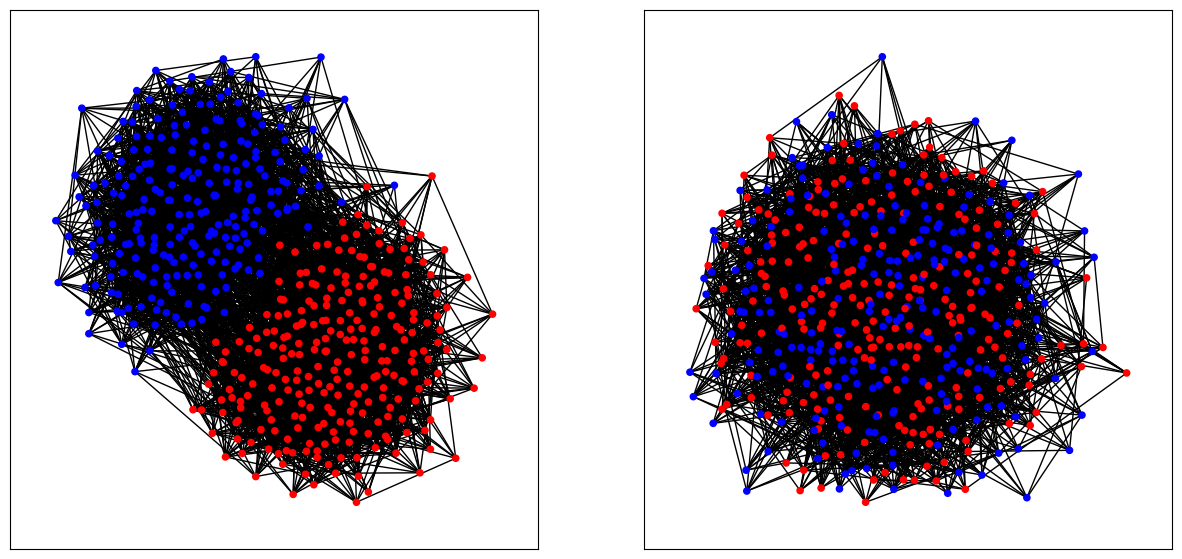

In [397]:
colors = ['blue' if g_pol.nodes[node]['ideology'] == '0' else 'red' for node in g_pol]

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

nx.draw_networkx(g_pol,
                 with_labels = False,
                 node_color = colors,
                 node_size = 20,
                 ax = axes[0])

nx.draw_networkx(g_non_pol,
                 with_labels = False,
                 node_color = colors,
                 node_size = 20,
                 ax = axes[1])

### **Efficient representatin/storage of network data**

- Adjacency matrix: N by N matrix in which each element represents the link between the nodes indexed by the corresponding row and column
  - Element $a_{ij}$ of the adjacence matrix represents the link between nodes i and j with 1 indicating the presence of a link, 0 indicating its absence
  - Undirected neworks the adjacence matrix is symmtetric
for weighted netowrks, matrix elements can take any vlaues correspodnign ot the link weigths
  - It can be oftentiems wateful with lots of 0s for sparse networks
- Edgelist/nodelist
  - We have been using this so far!
  - In the case of weighted networks, each edge is repsreseted as a triple, `source`, `target`, `weight`